# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [119]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import sklearn
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [121]:
print("Для воспроизводимости кода и результатов")

Для воспроизводимости кода и результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [122]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [123]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [124]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [125]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [126]:
#категориальные признаки трейн
df_train.describe(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [127]:
#числовые признаки трейн
df_train.describe(exclude=[object])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [128]:
#категориальные признаки тест
df_test.describe(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [129]:
#числовые признаки тест
df_test.describe(exclude=[object])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [130]:
#пропуски в трейне
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [131]:
#пропуски в трейне
print('пропуски в mileage:',df_train.mileage.isna().sum())
print('пропуски в engine:',df_train.engine.isna().sum())
print('пропуски в max_power:',df_train.max_power.isna().sum())
print('пропуски в torque:',df_train.torque.isna().sum())
print('пропуски в seats:',df_train.seats.isna().sum())

пропуски в mileage: 202
пропуски в engine: 202
пропуски в max_power: 196
пропуски в torque: 203
пропуски в seats: 202


In [132]:
#пропуски в тесте
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [133]:
#пропуски в тесте
print('пропуски в mileage:',df_test.mileage.isna().sum())
print('пропуски в engine:',df_test.engine.isna().sum())
print('пропуски в max_power:',df_test.max_power.isna().sum())
print('пропуски в torque:',df_test.torque.isna().sum())
print('пропуски в seats:',df_test.seats.isna().sum())

пропуски в mileage: 19
пропуски в engine: 19
пропуски в max_power: 19
пропуски в torque: 19
пропуски в seats: 19


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [134]:
#количество дубликатов
df_train.duplicated(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [135]:
#дубликаты
df_train[df_train.duplicated(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [136]:
#дроп дубликатов
df_train = df_train.drop_duplicates(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'])

In [137]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [138]:
#сброс индекса
df_train.reset_index(drop=True, inplace=True )
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [139]:
#Ф-ия для чистки колонок mileage, engine, max_power
def get_nums(column):
    if type(column) == float:
      return None
    elif len(re.findall(r'\d+',column.strip())) == 0:
      return None
    elif column.strip() == '0':
      return None
    else:
      return float('.'.join(re.findall(r'\d+',column.strip())))

In [140]:
#преобразуем трейн
df_train['mileage'] = df_train.mileage.apply(get_nums)
df_train['engine'] = df_train.engine.apply(get_nums)
df_train['max_power'] = df_train.max_power.apply(get_nums)

In [141]:
#преобразуем тест
df_test['mileage'] = df_test.mileage.apply(get_nums)
df_test['engine'] = df_test.engine.apply(get_nums)
df_test['max_power'] = df_test.max_power.apply(get_nums)

In [142]:
#Функция, которая достает значение крутящего момента из torque
def get_torque(col):
  if type(col) == float:
    return None
  elif re.findall(r'\d+\s\W\s\d+', col):
    return col.split('/')[0].strip()
  elif re.findall(r'\d+\snm\s/\d+\srpm', col.lower()):
    return ''.join(col.lower().split('/')[0].strip().split())
  elif re.findall(r'\d+nm@|\d+\W\d+nm@', col.lower()):
    return col.lower().split()[0].strip()
  elif re.findall(r'\d+@\s\d+\W\d+rpm|\d+@\s\d+rpm', col.lower()):
    return col.lower().split()[0].strip()
  elif re.findall(r'\d+\s+nm\s|\d+\W\d+\s+nm\s', col.lower()):
    return ''.join(col.lower().split()[0:2]).strip()
  elif re.findall(r'\d+nm.\d+\W\d+kgm.', col.lower()):
    return col.lower().split('@')[0]
  elif re.findall(r'\d+kgm@\s|\d+\W\d+kgm@\s', col.lower()):
    return col.lower().split()[0]
  elif re.findall(r'\d+\skgm\s|\d+\W\d+\skgm\s', col.lower()):
    return ''.join(col.lower().split()[0:2]).strip()
  elif re.findall(r'.kgm@ rpm.', col.lower()):
    return col.lower().split('@')[0] + 'kgm'
  elif re.findall(r'\d+nm\sat|\d+\W\d+nm\sat', col.lower()):
    return col.lower().split()[0]
  elif re.findall(r'\d+nm|\d+\W\d+nm', col.lower()):
    return col.lower()
  elif re.findall(r'\d+@\s\d+\W\d+|\d+\W\d+@\s\d+\W\d+', col.lower()):
    return col.lower().split('@')[0]

In [143]:
#Функция, которая достает значение оборотов из torque
def max_torque_rpm(col):
  if type(col) == float:
    return None
  elif re.findall(r'\d+\snm\s/\d+\srpm', col.lower()):
    return ''.join(col.lower().split('/')[1].strip().split())
  elif re.findall(r'\d+\s\W\s\d+', col):
    return col.split('/')[1].strip()
  elif re.findall(r'\d+rpm', col.lower()):
    return col.lower().split()[-1].strip()
  elif re.findall(r'\d+\s+rpm', col.lower()):
    return ''.join(col.lower().split('at')[-1].split())
  elif re.findall(r'.kgm@ rpm.', col.lower()):
    return col.split()[1].split('(')[0] + 'rpm'

In [144]:
#избавимся от бесящей @. Правда не знаю зачем :)
def drop_fkng(col):
  if col is None:
    return np.nan
  else:
    return col.replace('@', '')

In [145]:
#Тут все применим, почистим, переименуем. Чтоб прям как по заданию столбцы были
df_train['max_torque_rpm'] = df_train.torque.apply(max_torque_rpm)
df_train['torque'] = df_train.torque.apply(get_torque)
df_train['torque'] = df_train.torque.apply(drop_fkng)

In [146]:
#И то же самое для теста
df_test['max_torque_rpm'] = df_test.torque.apply(max_torque_rpm)
df_test['torque'] = df_test.torque.apply(get_torque)
df_test['torque'] = df_test.torque.apply(drop_fkng)

In [147]:
#Сохраним колонки ['torque', 'max_torque_rpm'] на будущее
df_train_torq = df_train[['torque', 'max_torque_rpm']]
df_test_torq = df_test[['torque', 'max_torque_rpm']]

#Удалим их из датасетов
del df_train['max_torque_rpm']
del df_train['torque']

del df_test['max_torque_rpm']
del df_test['torque']

In [148]:
#Сохраним промежуточное состояние датасетов
df_train.to_csv('df_train_temp.csv', index=False)
df_test.to_csv('df_test_temp.csv', index=False)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [149]:
#Заполняем трейн
df_train.fillna(df_train.median(), inplace=True)

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [151]:
#пропуски в трейне
print('пропуски в mileage:',df_train.mileage.isna().sum())
print('пропуски в engine:',df_train.engine.isna().sum())
print('пропуски в max_power:',df_train.max_power.isna().sum())
print('пропуски в seats:',df_train.seats.isna().sum())

пропуски в mileage: 0
пропуски в engine: 0
пропуски в max_power: 0
пропуски в seats: 0


In [152]:
#Заполняем тест медианами из трейна
df_test.fillna(df_train.median(), inplace=True)

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


In [154]:
#пропуски в тесте
print('пропуски в mileage:',df_test.mileage.isna().sum())
print('пропуски в engine:',df_test.engine.isna().sum())
print('пропуски в max_power:',df_test.max_power.isna().sum())
print('пропуски в seats:',df_test.seats.isna().sum())

пропуски в mileage: 0
пропуски в engine: 0
пропуски в max_power: 0
пропуски в seats: 0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [155]:
print("Потому, что это скорее не числовая характеристика авто, \
которая бы отражала лучше-хуже и тп, \
а некий индикатор принадлежности какому то классу (5-ти местный, 7-ми местный и тд)")

Потому, что это скорее не числовая характеристика авто, которая бы отражала лучше-хуже и тп, а некий индикатор принадлежности какому то классу (5-ти местный, 7-ми местный и тд)


In [156]:
#Конвертим в INT
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

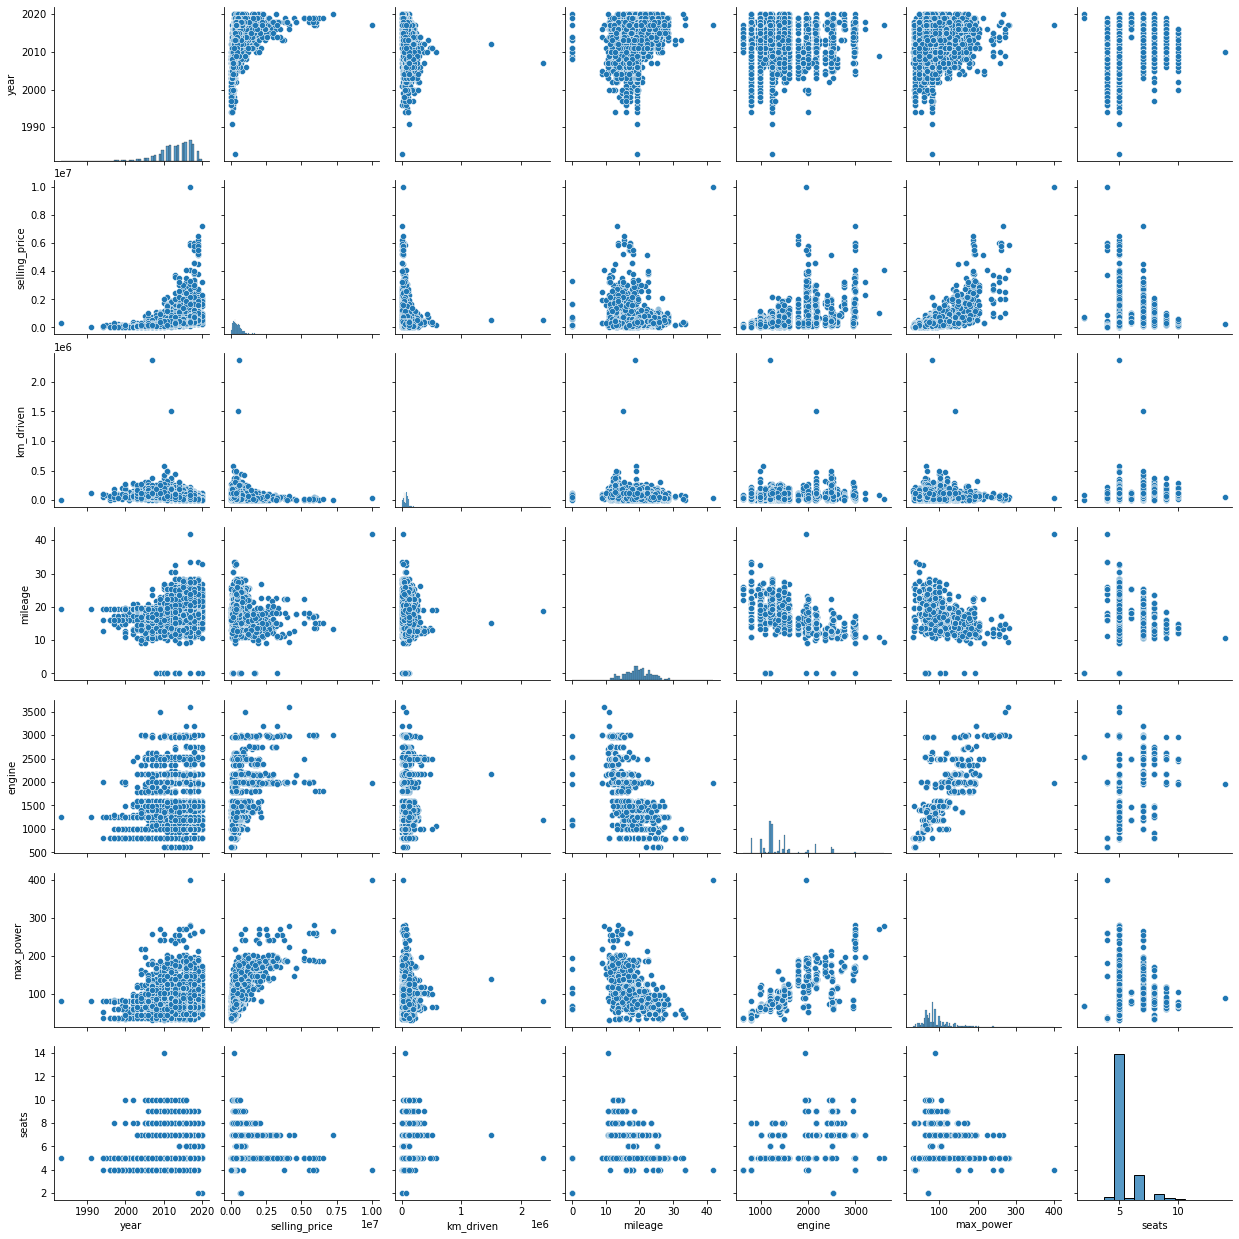

In [157]:
sns.pairplot(df_train.select_dtypes(include='number'))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Часть предикторов явно связаны с целевой переменной. Какой зависимостью сходу не ясно, но явно видно, что цена зависит от года авто, пробега, мощности и тп

Корреляция некоторых пар признаков так же явная. Например объем двигателя - мощность

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

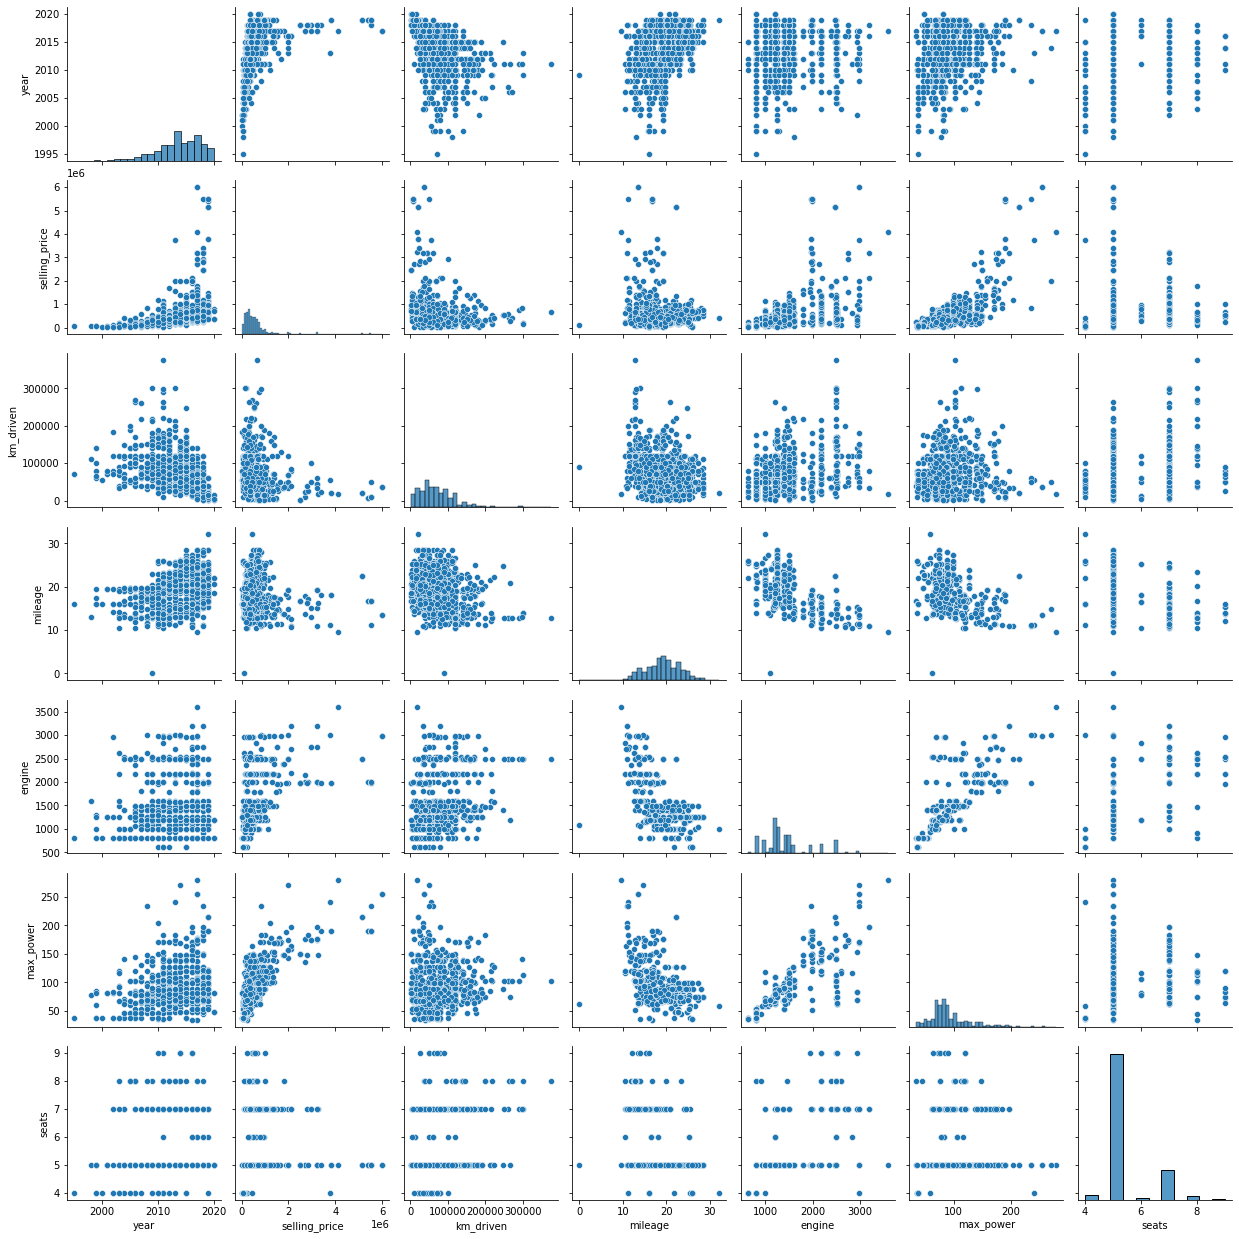

In [158]:
sns.pairplot(df_test.select_dtypes(include='number'))

В целом, сущности похожи

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

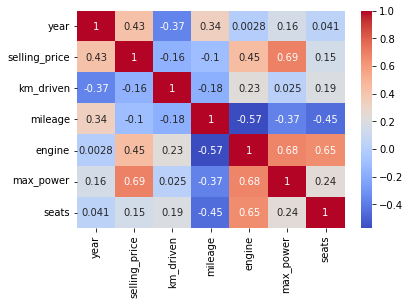

In [159]:
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot = True, cmap= 'coolwarm')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

- наименее скоррелированы engine и year
- между max power - selling price, max power - engine, engine - seats
- если судить по парному графику, то это утверждение не выглядит правдаподобным, да и обратная корреляция этих признаков заметно ниже среднего. (под "меньше год" я подразумеваю год выпуска, а не возраст авто)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

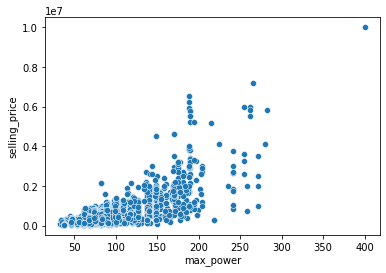

In [160]:
sns.scatterplot(x = df_train.max_power, y = df_train.selling_price );

Построю еще 1 график для следующих по силе корреляции переменных (там разница то всего в 0.01)

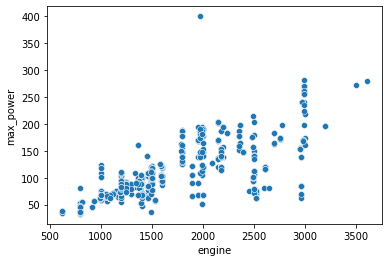

In [161]:
sns.scatterplot(x = df_train.engine, y = df_train.max_power );

Вот тут все явно видно и интерпритация очевидна. Больше объем - больше мощность.

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

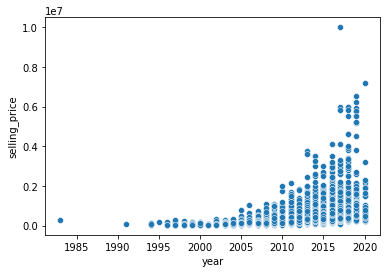

In [162]:
sns.scatterplot(x = df_train.year, y = df_train.selling_price );

На мой взгляд зависимость хоть и очевидная, но важная. Чем новее машина тем выше цена. Понятно, что не для всех авто, но зависимость налицо

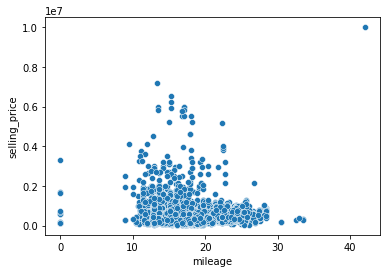

In [163]:
sns.scatterplot(x = df_train.mileage, y = df_train.selling_price );

Эта зависимость мне тоже показалась интересной.
С ростом расхода топлива цена на авто падает

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [164]:
y_train = df_train['selling_price']
X_train_num = df_train.select_dtypes(include='number').drop('selling_price', axis=1)

In [165]:
assert X_train_num.shape == (5840, 6)

In [166]:
y_test = df_test['selling_price']
X_test_num = df_test.select_dtypes(include='number').drop('selling_price', axis=1)

In [167]:
assert X_test_num.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()

lr.fit(X_train_num, y_train)

print('Ошибка r2:', r2_score(y_test, lr.predict(X_test_num)))
print('Ошибка MSE:', MSE(y_test, lr.predict(X_test_num)))

Ошибка r2: 0.5946576472666412
Ошибка MSE: 233002359160.80554


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns)

lr.fit(X_train_scaled, y_train)
print('Ошибка r2:', r2_score(y_test, lr.predict(X_test_scaled)))
print('Ошибка MSE:', MSE(y_test, lr.predict(X_test_scaled)))

Ошибка r2: 0.5946576472666552
Ошибка MSE: 233002359160.7975


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [170]:
#Посмотрим на наиболее значимый признак и значение его коэффициента
feature_imp = dict(zip(X_train_num.columns, lr.coef_))

print('Наиболее значимый признак:', dict([max(feature_imp.items(), key=lambda k_v: k_v[1])]))

Наиболее значимый признак: {'max_power': 324496.85782121646}


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [171]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso()

lr_lasso.fit(X_train_scaled, y_train)
print('Ошибка r2:', r2_score(y_test, lr_lasso.predict(X_test_scaled)))
print('Ошибка MSE:', MSE(y_test, lr_lasso.predict(X_test_scaled)))

Ошибка r2: 0.5946564811772821
Ошибка MSE: 233003029462.26755


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [172]:
lr_lasso.coef_

array([152247.14742736, -44065.05085353,  29317.30055383,  59320.137094  ,
       324497.75189092, -22156.30524519])

Ничего не занулилось, потому что коэффициент альфа по умолчанию =1

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [173]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
from sklearn.model_selection import GridSearchCV

greed_lasso = GridSearchCV(Lasso(),
                        param_grid={'alpha':np.arange(0, 1.1, 0.1)}, cv=10)

greed_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [175]:
#Лучший скор на кросс-валидации
greed_lasso.best_score_

0.5688059875247696

In [176]:
#Ошибки на тесте лучшей модели
print('Ошибка r2:', r2_score(y_test, greed_lasso.best_estimator_.predict(X_test_scaled)))
print('Ошибка MSE:', MSE(y_test, greed_lasso.best_estimator_.predict(X_test_scaled)))

Ошибка r2: 0.5946564811772821
Ошибка MSE: 233003029462.26755


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

11 моделей на 10 кросс-валидациях

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [177]:
#Лучший коэффициент регуляризации =0.9
greed_lasso.best_params_

{'alpha': 1.0}

In [178]:
lr_lasso = Lasso(alpha= 0.9)

lr_lasso.fit(X_train_scaled, y_train)
lr_lasso.coef_

array([152247.16730307, -44065.16238589,  29317.48532963,  59320.61439437,
       324497.66494532, -22156.59133394])

Веса не занулились

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [179]:
from sklearn.linear_model import ElasticNet

greed_en = GridSearchCV(ElasticNet(),
                        param_grid={'alpha':np.arange(0, 1.1, 0.1),
                                    'l1_ratio':np.arange(0, 1.1, 0.1)}, cv=10)

greed_en.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [180]:
#Лучший скор на кросс-валидации
greed_en.best_score_

0.577504456079141

In [181]:
#Ошибки на тесте лучшей модели
print('Ошибка r2:', r2_score(y_test, greed_en.best_estimator_.predict(X_test_scaled)))
print('Ошибка MSE:', MSE(y_test, greed_en.best_estimator_.predict(X_test_scaled)))

Ошибка r2: 0.5620795679979751
Ошибка MSE: 251729169412.28757


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [182]:
#Лучшие параметры
greed_en.best_params_

{'alpha': 0.5, 'l1_ratio': 0.7000000000000001}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [183]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

In [184]:
assert X_train_cat.shape == (5840, 10)

In [185]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [186]:
#Сначала сделаем seats категориальной фичей
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


In [187]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

scaler = StandardScaler()

cat_cols = X_train_cat.select_dtypes(include='object')
num_cols = X_train_cat.select_dtypes(exclude='object')

cat_cols = pd.get_dummies(cat_cols, drop_first=True)
num_cols = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)

X_train_cat = pd.concat([num_cols, cat_cols], axis = 1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [188]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


greed_ridge = GridSearchCV(Ridge(), scoring='r2',
                        param_grid={'alpha':np.arange(0, 1.1, 0.1)}, cv=10)

greed_ridge.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [189]:
#Лучший скор на кросс-валидации
greed_ridge.best_score_

0.6197665234764055

Качество немного подросло

Попробуем проверить на тесте

In [190]:
#соберем теперь и тестовую часть датасета подобным образом
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

cat_cols = X_test_cat.select_dtypes(include='object')
num_cols = X_test_cat.select_dtypes(exclude='object')

cat_cols = pd.get_dummies(cat_cols, drop_first=True)
num_cols = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)

X_test_cat = pd.concat([num_cols, cat_cols], axis = 1)

In [191]:
#Хотел посмотреть ошибку на тесте, но все посыпалось к чертям. Посмотрим почему
# print('Ошибка r2:', r2_score(y_test, greed_ridge.best_estimator_.predict(X_test_cat_dum)))
# print('Ошибка MSE:', MSE(y_test, greed_ridge.best_estimator_.predict(X_test_cat_dum)))

In [192]:
len(X_test_cat.columns)

20

In [193]:
len(X_train_cat.columns)

23

В трейне были авто с болшим количеством вариантов сидений. Поэтому и фичей получилось больше. Ок, оставим пока эту попытку и скажем, что судя по greed_ridge.best_score_ качество немного выросло

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [196]:
#загрузим сохраненные данные без заполнения пропусков
df_train = pd.read_csv('df_train_temp.csv')
df_test = pd.read_csv('df_test_temp.csv')

In [197]:
#для начала верну разбитый на 2 столбца torque
df_train = pd.concat([df_train, df_train_torq], axis=1)
df_test = pd.concat([df_test, df_test_torq], axis=1)

In [199]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190nm,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250nm,1500-2500rpm
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,22.4kgm,1750-2750rpm
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,11.5kgm,"4,500rpm"
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75nm,4000rpm


In [200]:
#В колонке torque разные единицы измерения. Переведем кг\м в Нм
#1 кг\м ~ 9.81 Нм
def kgm_to_nm(col):
  if type(col) == float:
    return np.nan
  elif re.findall(r'\d+nm.\d+\W\d+\w+.', col):
    return float(re.findall(r'\d+|\d+\W\d+', col.split('(')[0])[0])
  elif re.findall(r'\d+kgm', col):
    if len(re.findall(r'\d+|\d+\W\d+', col)) == 1:
      return float(re.findall(r'\d+|\d+\W\d+', col)[0]) * 9.81
    elif len(re.findall(r'\d+|\d+\W\d+', col)) == 2:
      return float('.'.join(re.findall(r'\d+|\d+\W\d+', col))) * 9.81
  elif re.findall(r'\d+nm', col):
    if len(re.findall(r'\d+|\d+\W\d+', col)) == 1:
      return float(re.findall(r'\d+|\d+\W\d+', col)[0])
    elif len(re.findall(r'\d+|\d+\W\d+', col)) == 2:
      return float('.'.join(re.findall(r'\d+|\d+\W\d+', col)))
  else:
    return float(col)

In [201]:
#Почистим колонку max_torque_rpm
#там, где значение оборотов указано диапазоном, возьмем среднее в нем
def clear_max_torque_rpm(col):
  if col is None:
    return np.nan
  else:
    val = col.replace(',', '').replace('+/-500', '').replace('rpm', '').replace('~', '-')
    if len(val.split('-')) == 1:
      return float(val)
    elif len(val.split('-')) == 2:
      return np.mean(list(map(int, val.split('-'))))

In [202]:
#Применим все это
df_train['torque'] = df_train.torque.apply(kgm_to_nm)
df_train['max_torque_rpm'] = df_train.max_torque_rpm.apply(clear_max_torque_rpm)

df_test['torque'] = df_test.torque.apply(kgm_to_nm)
df_test['max_torque_rpm'] = df_test.max_torque_rpm.apply(clear_max_torque_rpm)

In [203]:
#Спарсим марку авто
def auto_brend(col):
  return col.split()[0]

In [204]:
#заведем отдельный признак с названием бренда
df_train['brand'] = df_train.name.apply(auto_brend)
df_test['brand'] = df_test.name.apply(auto_brend)

In [205]:
#Как показал опыт выше, в тесте и трейне категориальные фичи после кодирования не совпадают.
#Поэтому, слепим тест и трейн в один датасет и зафитим ohe encoder на полных данных
df = pd.concat([df_train, df_test], axis=0)
df.reset_index(drop=True, inplace=True )
df.seats.fillna(df.seats.mode()[0], inplace=True)
df['seats'] = df.seats.astype(int).astype(str)

cat_cols = df.select_dtypes(include='object').drop('name', axis=1)

ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(cat_cols)

OneHotEncoder(drop='first', sparse=False)

Посмотрим, есть ли какие то явные выбросы в некоторых колонках

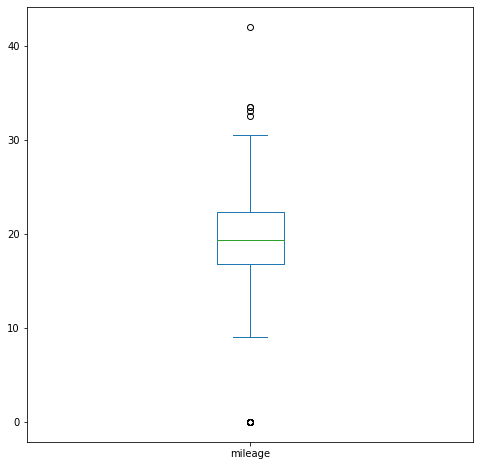

In [206]:
df_train.mileage.plot(kind='box', figsize=(8, 8))
plt.show()

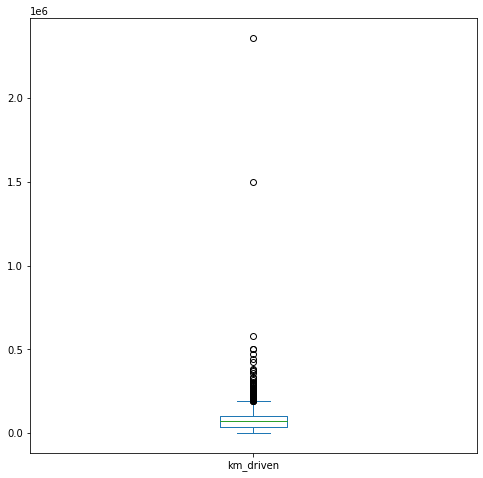

In [207]:
df_train.km_driven.plot(kind='box', figsize=(8, 8))
plt.show()

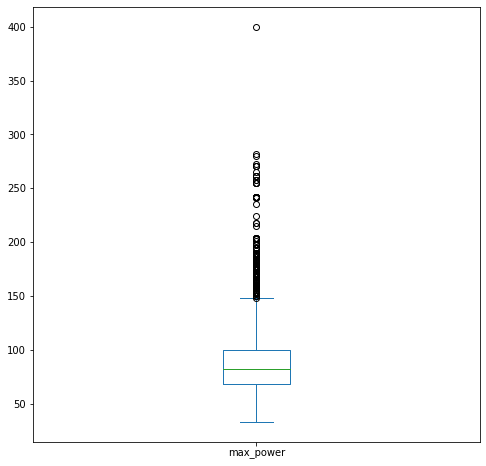

In [208]:
df_train.max_power.plot(kind='box', figsize=(8, 8))
plt.show()

Посмотрим на эти выбросы

In [209]:
df_train.loc[df_train.max_power > 300]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,brand
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0,640.0,1740.0,Volvo


In [210]:
df_train.loc[df_train.km_driven >= 500000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,brand
1397,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,7.0,330.0,2200.0,Mahindra
2680,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0,114.7,4000.0,Hyundai
2700,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67.00,5.0,84.0,3500.0,Maruti
2780,Maruti Wagon R VXI BS IV,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90.0,3500.0,Maruti
4844,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.57,7.0,200.0,2400.0,Toyota


In [211]:
df_train.loc[(df_train.mileage == 0) | (df_train.mileage > 40)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm,brand
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.00,4.0,640.000,1740.0,Volvo
533,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65.00,5.0,96.138,3000.0,Tata
1276,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5.0,96.100,3000.0,Hyundai
1301,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.00,5.0,510.000,NaN,Mercedes-Benz
1660,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179.0,115.00,5.0,400.000,2000.0,Land
1851,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.10,5.0,96.100,3000.0,Hyundai
2114,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.10,5.0,96.100,3000.0,Hyundai
3827,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,5.0,96.100,3000.0,Hyundai
4254,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0,175.000,2800.0,Volkswagen
4257,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0,175.000,2800.0,Volkswagen


In [212]:
#удалим их с датасета
df_train.drop(df_train[df_train.max_power > 300].index, inplace=True)
df_train.drop(df_train[(df_train.mileage == 0) | (df_train.mileage > 40)].index, inplace=True)
df_train.drop(df_train[df_train.km_driven >= 500000].index, inplace=True)

df_train.reset_index(drop=True, inplace=True )

In [213]:
#Посмотрим пропуски
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5820 non-null   object 
 1   year            5820 non-null   int64  
 2   selling_price   5820 non-null   int64  
 3   km_driven       5820 non-null   int64  
 4   fuel            5820 non-null   object 
 5   seller_type     5820 non-null   object 
 6   transmission    5820 non-null   object 
 7   owner           5820 non-null   object 
 8   mileage         5634 non-null   float64
 9   engine          5634 non-null   float64
 10  max_power       5633 non-null   float64
 11  seats           5634 non-null   float64
 12  torque          5633 non-null   float64
 13  max_torque_rpm  5625 non-null   float64
 14  brand           5820 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 682.2+ KB


In [214]:
#Заполним пропуски средним арифметическим, а seats заполним модой и сделаем категориальным признаком
df_train.seats.fillna(df_train.seats.mode()[0], inplace=True)
df_train = df_train.fillna(df_train.mean())

df_train['seats'] = df_train.seats.astype(int).astype(str)


df_test.seats.fillna(df_train.seats.mode()[0], inplace=True)
df_test = df_test.fillna(df_train.mean())

df_test['seats'] = df_test.seats.astype(int).astype(str)

In [215]:
#Добавим предложенное отношение числа "лошадей" на литр объема
df_train['power_per_eng'] = (df_train.max_power / df_train.engine) * 1000
df_test['power_per_eng'] = (df_test.max_power / df_test.engine) * 1000

#Добавим предложенный квадрат года
df_train['year^2'] = df_train.year ** 2
df_test['year^2'] = df_test.year ** 2

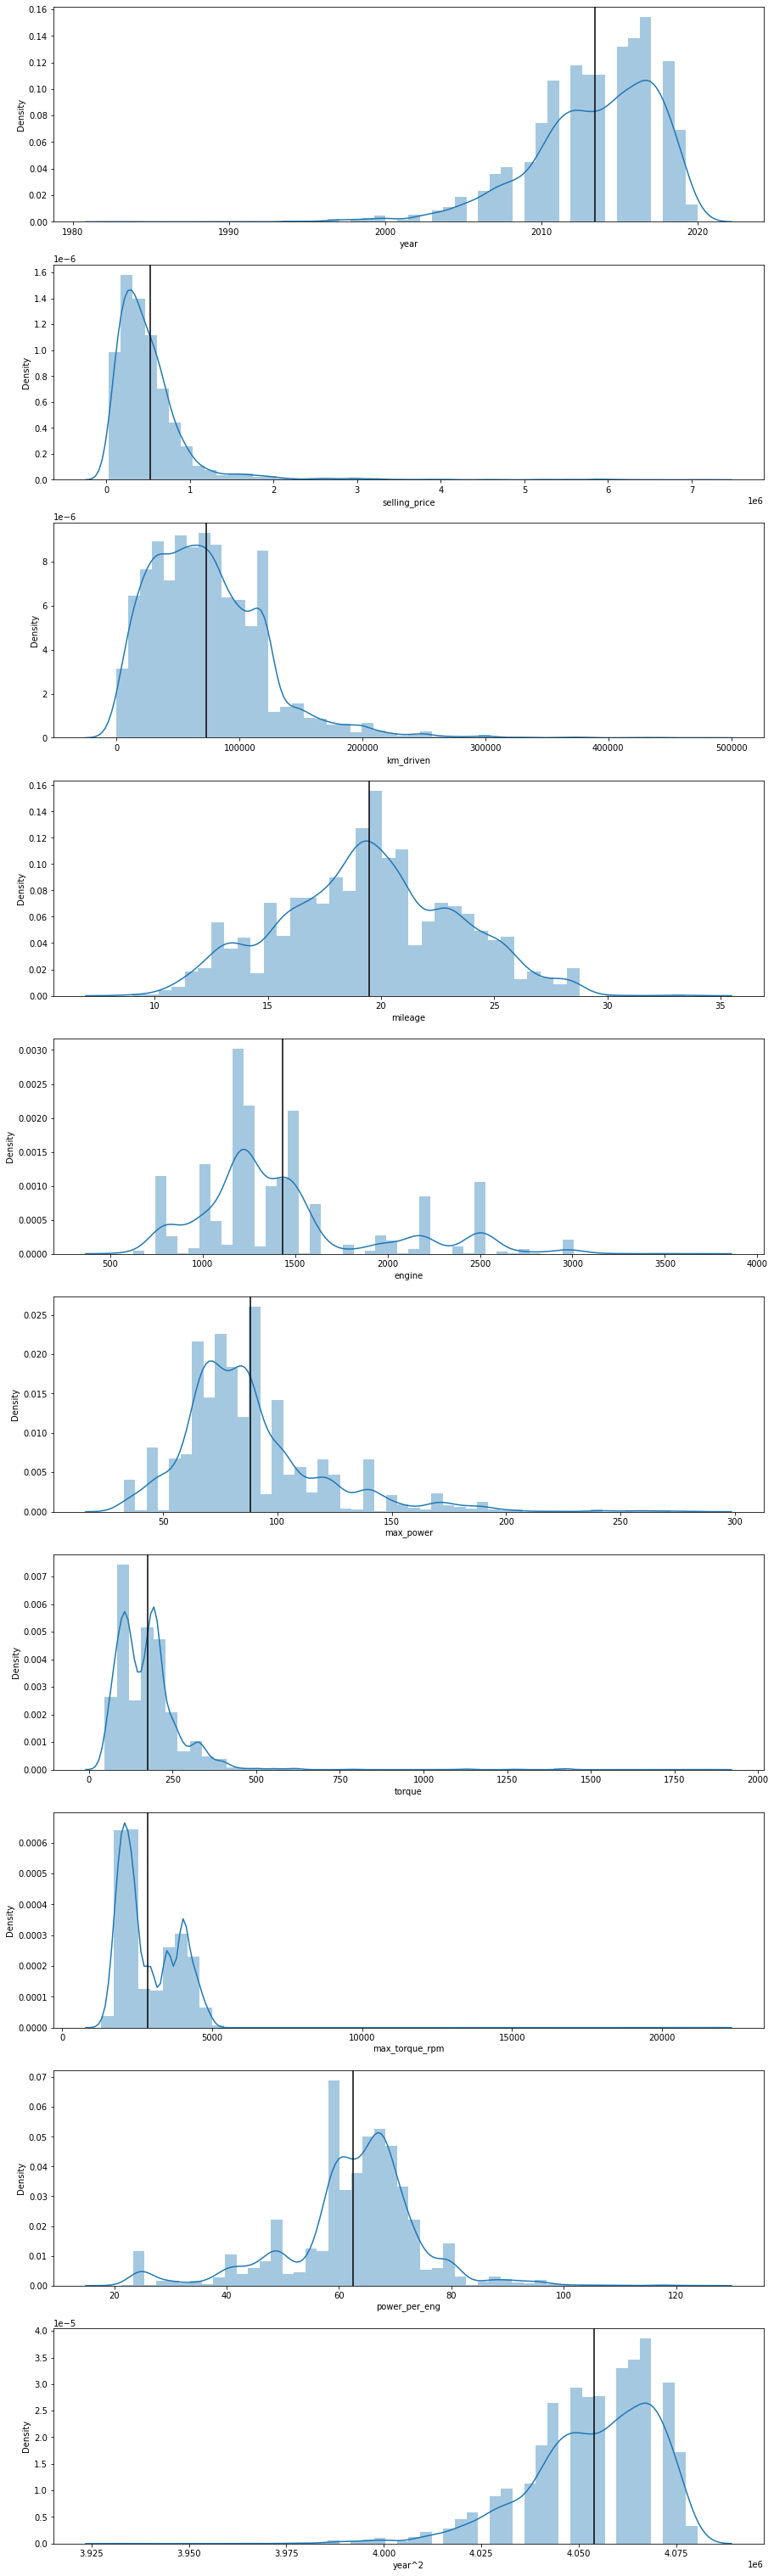

In [216]:
#Посмотрим на распределение признаков
num = df_train.select_dtypes(include=np.number)
n = num.shape[1]

fig, axes = plt.subplots(n, 1, figsize=(15, 55))

for ax, col in zip(axes, num):
    sns.distplot(num[col], ax=ax)
    ax.axvline(num[col].mean(), c='k')

In [217]:
#отлогарифмируем некоторые из признаков и добавим их
# df_train['engine_log'] = df_train.engine.apply(np.log)
df_train['torque_log'] = df_train.torque.apply(np.log)
# df_train['max_torque_rpm_log'] = df_train.max_torque_rpm.apply(np.log)
df_train['max_power_log'] = df_train.max_power.apply(np.log)
df_train['km_driven_log'] = df_train.km_driven.apply(np.log)
df_train['year_log'] = df_train.year.apply(np.log)
df_train['year^2_log'] = df_train['year^2'].apply(np.log)
df_train['power_per_eng_log'] = df_train.power_per_eng.apply(np.log)

#P.S. тут было перепробованно несколько вариантов, оставил тот где скор побольше

In [218]:
#и то же самое на тесте
# df_test['engine_log'] = df_test.engine.apply(np.log)
df_test['torque_log'] = df_test.torque.apply(np.log)
# df_test['max_torque_rpm_log'] = df_test.max_torque_rpm.apply(np.log)
df_test['max_power_log'] = df_test.max_power.apply(np.log)
df_test['km_driven_log'] = df_test.km_driven.apply(np.log)
df_test['year_log'] = df_test.year.apply(np.log)
df_test['year^2_log'] = df_test['year^2'].apply(np.log)
df_test['power_per_eng_log'] = df_test.power_per_eng.apply(np.log)

In [219]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,max_torque_rpm,brand,power_per_eng,year^2,torque_log,max_power_log,km_driven_log,year_log,year^2_log,power_per_eng_log
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,2000.0,Maruti,59.294872,4056196,5.247024,4.304065,11.887931,7.607878,15.215756,4.082523
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,2000.0,Skoda,69.105474,4056196,5.521461,4.639765,11.695247,7.607878,15.215756,4.235634
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,2250.0,Hyundai,64.469914,4040100,5.392463,4.499810,11.751942,7.605890,15.211780,4.166199
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,4500.0,Maruti,67.950693,4028049,4.725749,4.479607,11.695247,7.604396,15.208793,4.218782
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,...,4000.0,Hyundai,68.387636,4068289,4.734003,4.405010,10.714418,7.609367,15.218733,4.225192


In [220]:
X_train = df_train.drop(['selling_price', 'name'], axis = 1)
y_train = df_train.selling_price

X_test = df_test.drop(['selling_price', 'name'], axis = 1)
y_test = df_test.selling_price

In [221]:
#отскалируем числовые признаки и закодируем категориальные
scaler = StandardScaler()

cat_train = X_train.select_dtypes(include='object')
num_train = X_train.select_dtypes(exclude='object')

cat_train = pd.DataFrame(ohe.transform(cat_train))
num_train = pd.DataFrame(scaler.fit_transform(num_train), columns=num_train.columns)

X_train = pd.concat([num_train, cat_train], axis = 1)

In [222]:
#тоже самое для теста
cat_test = X_test.select_dtypes(include='object')
num_test = X_test.select_dtypes(exclude='object')

cat_test = pd.DataFrame(ohe.transform(cat_test))
num_test = pd.DataFrame(scaler.transform(num_test), columns=num_test.columns)

X_test = pd.concat([num_test, cat_test], axis = 1)

In [223]:
#сохраним scaler
pickle.dump(scaler, open('scaler.sav', 'wb'))

In [224]:
greed_lasso = GridSearchCV(Lasso(),
                        param_grid={'alpha':np.arange(0, 1, 0.1)}, cv=10)

greed_lasso.fit(X_train, y_train)
greed_lasso.best_score_

0.7283775027713191

In [225]:
greed_en = GridSearchCV(ElasticNet(),
                        param_grid={'alpha':np.arange(0, 1.1, 0.1),
                                    'l1_ratio':np.arange(0, 1.1, 0.1)}, cv=10)

greed_en.fit(X_train, y_train)
greed_en.best_score_

0.7283775027713191

In [226]:
greed_ridge = GridSearchCV(Ridge(), scoring='r2',
                        param_grid={'alpha':np.arange(0, 1.1, 0.1)}, cv=10)

greed_ridge.fit(X_train, y_train)
greed_ridge.best_score_

0.736436178551015

In [227]:
greed_ridge.best_params_

{'alpha': 1.0}

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [228]:
#лучшая модель
model = Ridge(alpha = 1.0)

model.fit(X_train, y_train)

Ridge()

In [229]:
def business_metrics(y_true, y_pred):
  count = 0
  for i,j in zip(y_true, y_pred):
    if abs(i-j) <= i * 0.1:
      count += 1

  return count / len(y_true)

In [230]:
business_metrics = business_metrics(y_test, model.predict(X_test))
business_metrics

0.287

In [231]:
print('Ошибка r2:', r2_score(y_test, model.predict(X_test)))
print('Ошибка MSE:', MSE(y_test, model.predict(X_test)))

Ошибка r2: 0.7955310664115736
Ошибка MSE: 117534581767.56818


In [232]:
#сохраним модель и OneHotEncoder
pickle.dump(model, open('model.sav', 'wb'))
pickle.dump(ohe, open('ohe.sav', 'wb'))

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link